# پرسش ۱

برای پیدا کردن بهترین دایره تخمین‌زننده، ابتدا توجه کنید که سه پارامتر برای بهینه‌سازی داریم؛ مختصات دو بعدی مرکز و شعاع. و همچنین برای معادله دایره داریم  
$$(x-x_0)^2+(y-y_0)^2=r^2$$
حال برای اینکه با روش کمترین مربعات حل‌کنیم، نیاز داریم تا آن‌را به یک فرم خطی بنویسیم. پس آن را باز می‌کنیم  

$$x^2-2x_0x+x_0^2+y^2-2y_0y+y_0^2=r^2$$
$$\implies x^2-2x_0x+y^2-2y_0y=r^2-x_0^2-y_0^2 = z_0$$
$$\implies x^2+y^2=z_0+2x_0x+2y_0y$$
حال یک فرم خطی بر حسب $x_0,y_0,z_0$
داریم. اگر به فرم ماتریسی بنویسیم  


$$\begin{bmatrix}
2x_1 & 2y_1 & 1\\
2x_2 & 2y_2 & 1 \\
     & \vdots & \\
2x_n & 2y_n & 1
\end{bmatrix} \begin{bmatrix}
x_0\\
y_0 \\
z_0
\end{bmatrix} 
=
\begin{bmatrix}
x_1^2 + y_1^2\\
x_2^2 + y_2^2\\
\vdots  \\
x_n^2 + y_n^2\\
\end{bmatrix} 
$$  

و در نهایت با روش حل کمترین مربعات، جواب را به دست می‌آوریم۰   

پس از آن برای به دست آوردن شعاع نیز با توجه به تعریف $z_0$
داریم
$$r = \sqrt{z_0+x_0^2+y_0^2} $$

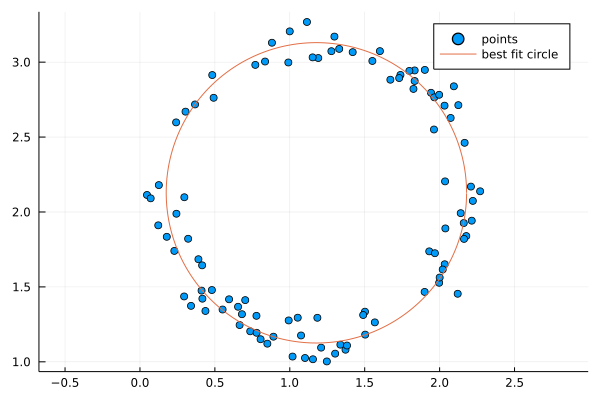

In [3]:
using LinearAlgebra, DelimitedFiles, Plots

points = readdlm("./data1.txt", ',')


function ls_circle(pts)
    mat = [2 * pts ones(size(pts)[1])]
    b = pts[:, 1] .^ 2 + pts[:, 2] .^ 2
    ans = mat \ b
    ans[3] = sqrt(ans[3] + ans[1]^2 + ans[2]^2)
    return ans
end

function get_circle_points(spec)
    theta = collect(0:0.01:2*pi)
    x = spec[3] * cos.(theta) .+ spec[1]
    y = spec[3] * sin.(theta) .+ spec[2]
    return [x y]
end

circ_spec = ls_circle(points)
circ = get_circle_points(circ_spec)

plt = scatter(points[:, 1], points[:, 2], aspect_ratio = 1, label="points")
plot!(plt, circ[:, 1], circ[:, 2], label="best fit circle")
display(plt)